–û–ò–ê–î. –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ2
–í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
–î–∞—Ç–∞—Å–µ—Ç: datasets/students_simple.csv –í—ã–±–∏—Ä–∞—é—Ç—Å—è 2 —Å–ª–æ–±–∫–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ —Ñ–æ—Ä–º—É–ª–∞–º:
1. N%5
2. N^2%5+5

–ó–∞–¥–∞–Ω–∏–µ 1: –†–∞—Å—á–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
–§–µ—Ö–Ω–µ—Ä–∞
–ü–∏—Ä—Å–æ–Ω–∞ + –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª
–°–ø–∏—Ä–º–µ–Ω–∞
–ö–µ–Ω–¥–µ–ª–ª–∞

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv("students_simple.csv")

In [2]:
N = 22
N1 = N % 5
N2 = (N ** 2) % 5 + 5
N1, N2

(2, 9)

In [4]:
col1 = data.columns[N1] 
col2 = data.columns[N2]
col1, col2

('income', 'test_time')

In [5]:
my_data = data.iloc[:, [N1, N2]]
display(my_data)
x = my_data.iloc[:, 0]
y = my_data.iloc[:, 1]

income  test_time
0      430        8.5
1      640        6.2
2      610        6.8
3      330       12.0
4      420        7.5
5      290       10.0
6      480        7.2
7      610        4.2
8      840        3.5
9      330        9.5
10     560        7.8
11     450        8.0
12     350        6.0
13     310        4.8
14     380        8.6
15     340       10.0
16     660        4.5
17     450       12.5
18     540       10.5
19     750        6.5

–§–µ—Ö–Ω–µ—Ä–∞

In [6]:
def fechner_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sign_x =  np.sign(x - x_mean)
    sign_y =  np.sign(y - y_mean)
    matches = np.sum(sign_x * sign_y > 0)
    mismatches = np.sum(sign_x * sign_y < 0)
    fechner = (matches - mismatches) / (matches + mismatches)
    return fechner

In [7]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –§–µ—Ö–Ω–µ—Ä–∞ : {fechner_corr(x,y)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –§–µ—Ö–Ω–µ—Ä–∞ : -0.4


–ü–∏—Ä—Å–æ–Ω–∞ + –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª

In [8]:
pearson_r, pearson_p = stats.pearsonr(x, y)
pearson_r

np.float64(-0.5698939517430255)

In [9]:
def pearson_corr(x,y) -> float:
    x_mean: float = np.mean(x)
    y_mean: float = np.mean(y)
    numerator: float = np.sum((x - x_mean) * (y - y_mean)) #–∫–æ–≤–∞—Ä–∏–∞—Ü–∏—è
    denominator: float = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    return numerator / denominator

In [10]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ : {pearson_corr(x,y)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ : -0.5698939517430254


In [11]:
def confidence_interval(x, y, confidence_level = 0.95):
    r = pearson_corr(x, y)
    z = np.arctanh(r)
    n = len(x)
    se_z = 1 / np.sqrt(n - 3)
    quantile = stats.norm.ppf((1 + confidence_level) / 2) 
    z_lower = z - quantile * (1 / np.sqrt(n - 3))
    z_upper = z + quantile * (1 / np.sqrt(n - 3))
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    return (r_lower, r_upper)

In [12]:
left_bound, right_bound = confidence_interval(x, y)
print(f"95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: [{left_bound:.3f}, {right_bound:.3f}]")

95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª: [-0.809, -0.170]


–°–ø–∏—Ä–º–µ–Ω–∞
–≤—ã—á–∏—Å–ª—è–µ—Ç –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –°–ø–∏—Ä–º–µ–Ω–∞ —á–µ—Ä–µ–∑ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ü–∏—Ä—Å–æ–Ω–∞ –¥–ª—è —Ä–∞–Ω–≥–æ–≤

In [13]:
spearman_r, spearman_p = stats.spearmanr(x, y)
spearman_r

np.float64(-0.5391567793643103)

In [14]:
def spearman_corr(x, y) -> float:
    rank_x = x.rank(method='average')
    rank_y = y.rank(method='average') #—Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ
    corr = pearson_corr(rank_x, rank_y)
    return corr

In [15]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞: {spearman_corr(x, y)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞: -0.5391567793643103


–ö–µ–Ω–¥–µ–ª–ª–∞

In [18]:
kendall_tau, kendall_p = stats.kendalltau(x, y)
kendall_tau

np.float64(-0.43617638325413816)

In [21]:
def kendall_tau_b(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    n = x.size

    concordant = 0
    discordant = 0
    ties_x = 0
    ties_y = 0
    for i in range(n - 1):
        dx = x[i + 1:] - x[i]
        dy = y[i + 1:] - y[i]
        sx = np.sign(dx)
        sy = np.sign(dy)
        ties_x += np.sum(sx == 0)
        ties_y += np.sum(sy == 0)
        mask = (sx != 0) & (sy != 0)
        sxy = sx[mask] * sy[mask]

        concordant += np.sum(sxy > 0)
        discordant += np.sum(sxy < 0)

    n0 = n * (n - 1) // 2
    denom = math.sqrt((n0 - ties_x) * (n0 - ties_y))

    if denom == 0:
        return np.nan

    tau = (concordant - discordant) / denom
    return tau

In [23]:
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö–µ–Ω–¥–µ–ª–ª–∞: {kendall_tau_b(x, y)}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ö–µ–Ω–¥–µ–ª–ª–∞: -0.43617638325413816


In [24]:
data = {
    '–ú–µ—Ç–æ–¥': ['–§–µ—Ö–Ω–µ—Ä–∞', '–ü–∏—Ä—Å–æ–Ω–∞', '–°–ø–∏—Ä–º–µ–Ω–∞', '–ö–µ–Ω–¥–∞–ª–ª–∞'],
    '–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç': [
        fechner_corr(x, y),
        pearson_corr(x, y),
        spearman_corr(x, y),
        kendall_tau_b(x, y)
    ]
}
df = pd.DataFrame(data)
display(df)

–ú–µ—Ç–æ–¥  –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç
0   –§–µ—Ö–Ω–µ—Ä–∞    -0.400000
1   –ü–∏—Ä—Å–æ–Ω–∞    -0.569894
2  –°–ø–∏—Ä–º–µ–Ω–∞    -0.539157
3  –ö–µ–Ω–¥–∞–ª–ª–∞    -0.436176

–í—ã–≤–æ–¥:

–ò—Å—Ö–æ–¥—è –∏–∑ –§–µ—Ö–Ω–µ—Ä–∞: —É–º–µ—Ä–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å
–í—Å–µ —á–µ—Ç—ã—Ä–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–ª–∞–±—É—é –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ income –∏ test_time. –ó–Ω–∞—á–µ–Ω–∏—è –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç ‚Äì0.56 –¥–æ ‚Äì0.40, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç: –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –¥–æ—Ö–æ–¥–∞ (income) –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è –∫ –Ω–µ–±–æ–ª—å—à–æ–º—É —Å–Ω–∏–∂–µ–Ω–∏—é –≤—Ä–µ–º–µ–Ω–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–∞, –æ–¥–Ω–∞–∫–æ —Å–≤—è–∑—å –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å–∏–ª—å–Ω–æ–π –∏, –≤–µ—Ä–æ—è—Ç–Ω–æ, –Ω–µ—É—Å—Ç–æ–π—á–∏–≤–∞. –†–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –º–µ—Ç–æ–¥–∞–º–∏ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è —Ç–µ–º, —á—Ç–æ –ü–∏—Ä—Å–æ–Ω –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç –ª–∏–Ω–µ–π–Ω—É—é, –∞ –°–ø–∏—Ä–º–µ–Ω –∏ –ö–µ–Ω–¥–∞–ª–ª ‚Äî –º–æ–Ω–æ—Ç–æ–Ω–Ω—É—é (–ø–æ —Ä–∞–Ω–≥–∞–º) –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å, –ø—Ä–∏ —ç—Ç–æ–º –§–µ—Ö–Ω–µ—Ä –¥–∞—ë—Ç –±–æ–ª–µ–µ –≥—Ä—É–±—É—é –æ—Ü–µ–Ω–∫—É —Ç–æ–ª—å–∫–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Å–≤—è–∑–∏

–ó–∞–¥–∞–Ω–∏–µ 2: –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

1. –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞

In [26]:
def hist(data, feature_name="–ü—Ä–∏–∑–Ω–∞–∫"):
    plt.hist(data, bins=10, edgecolor='black', color='violet', alpha=0.9)
    plt.title("–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞", fontsize=14)
    plt.xlabel(feature_name, fontsize=14) 
    plt.ylabel("–ß–∞—Å—Ç–æ—Ç–∞", fontsize=14)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

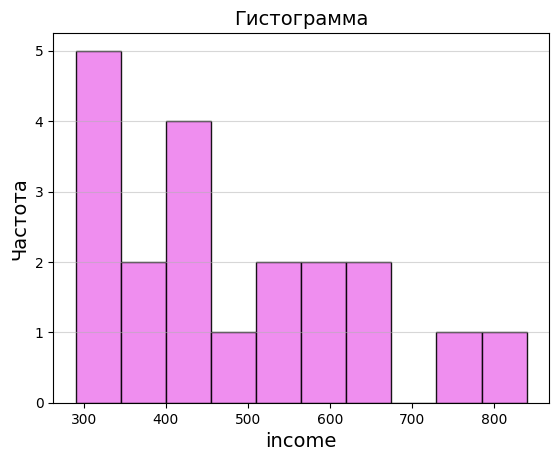

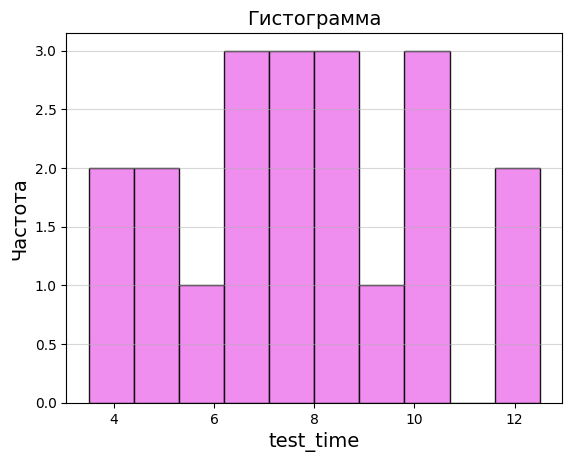

In [28]:
hist(x, "income")
hist(y, "test_time")

In [34]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.9, s=50)
    plt.title("Scatter Plot", fontsize=14, fontweight='bold')
    plt.xlabel("income", fontsize=12)
    plt.ylabel("test_time", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

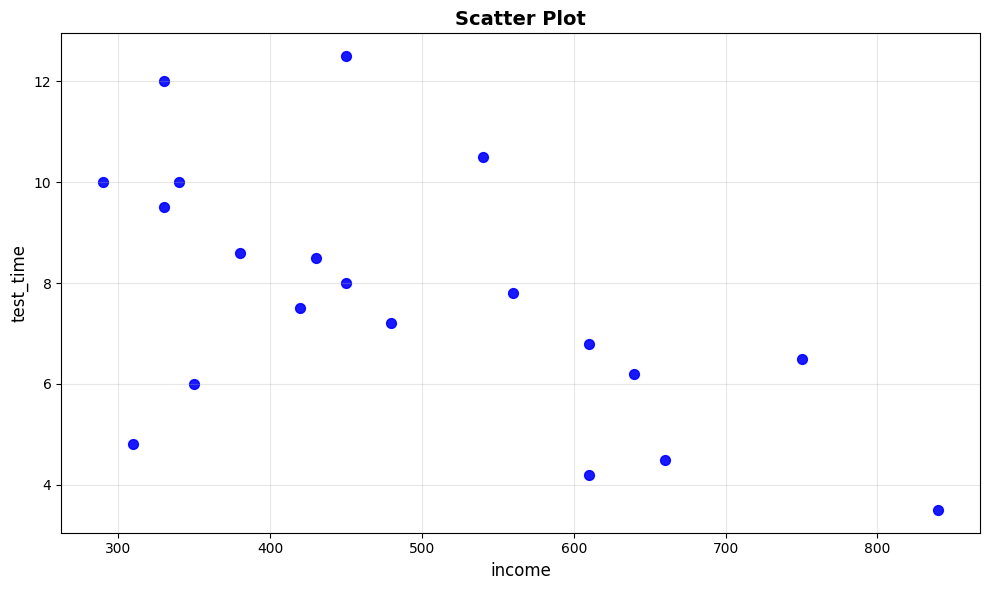

In [35]:
scatter_plot(x, y)

3. –£—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å —É—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø–æ –≤–∏–¥–∞–º:

In [1]:
def plot_model(title, y_pred, eq_text, color='red'):
    plt.figure(figsize=(9, 6))
    plt.scatter(x, y, c='blue', s=50, alpha=0.8, label='–î–∞–Ω–Ω—ã–µ')
    plt.plot(x_range, y_pred, color=color, lw=2, label='–ú–æ–¥–µ–ª—å')
    plt.text(0.97, 0.03, eq_text, transform=plt.gca().transAxes,
             ha='right', va='bottom', fontsize=11, color=color,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor=color))
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel("income"); plt.ylabel("test_time")
    plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv("students_simple.csv")
N = 22
N1 = N % 5
N2 = (N ** 2) % 5 + 5
N1, N2
my_data = data.iloc[:, [N1, N2]]
display(my_data)
x = my_data.iloc[:, 0]
y = my_data.iloc[:, 1]

income  test_time
0      430        8.5
1      640        6.2
2      610        6.8
3      330       12.0
4      420        7.5
5      290       10.0
6      480        7.2
7      610        4.2
8      840        3.5
9      330        9.5
10     560        7.8
11     450        8.0
12     350        6.0
13     310        4.8
14     380        8.6
15     340       10.0
16     660        4.5
17     450       12.5
18     540       10.5
19     750        6.5

In [9]:
col1 = data.columns[N1] 
col2 = data.columns[N2]
col1, col2

('income', 'test_time')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array(x).flatten()
y = np.array(y).flatten()

X = x.reshape(-1, 1)
x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

1. –õ–∏–Ω–µ–π–Ω–∞—è

In [11]:
model_lin = LinearRegression().fit(X, y)
w1_lin, w0_lin = model_lin.coef_[0], model_lin.intercept_
y_pred_lin = model_lin.predict(x_range)
r2_lin = model_lin.score(X, y)

R¬≤ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏):

–ü–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫–∞—è –¥–æ–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏ Y –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é
R¬≤ = 1 - (SS_residual / SS_total)
–ß–µ–º –±–ª–∏–∂–µ –∫ 1, —Ç–µ–º –ª—É—á—à–µ –º–æ–¥–µ–ª—å –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ

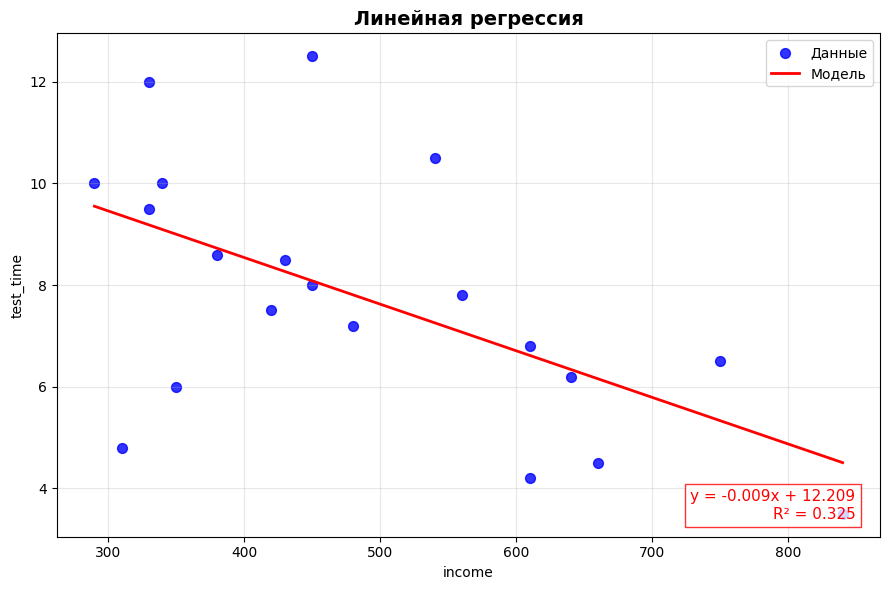

In [12]:
plot_model("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è",
           y_pred_lin,
           f"y = {w1_lin:.3f}x + {w0_lin:.3f}\nR¬≤ = {r2_lin:.3f}")

2.–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è

In [13]:
X_quad = np.column_stack((x**2, x))
model_quad = LinearRegression().fit(X_quad, y)
w2, w1_quad = model_quad.coef_
w0_quad = model_quad.intercept_
x_range_quad = np.column_stack((x_range**2, x_range))
y_pred_quad = model_quad.predict(x_range_quad)
r2_quad = model_quad.score(X_quad, y)

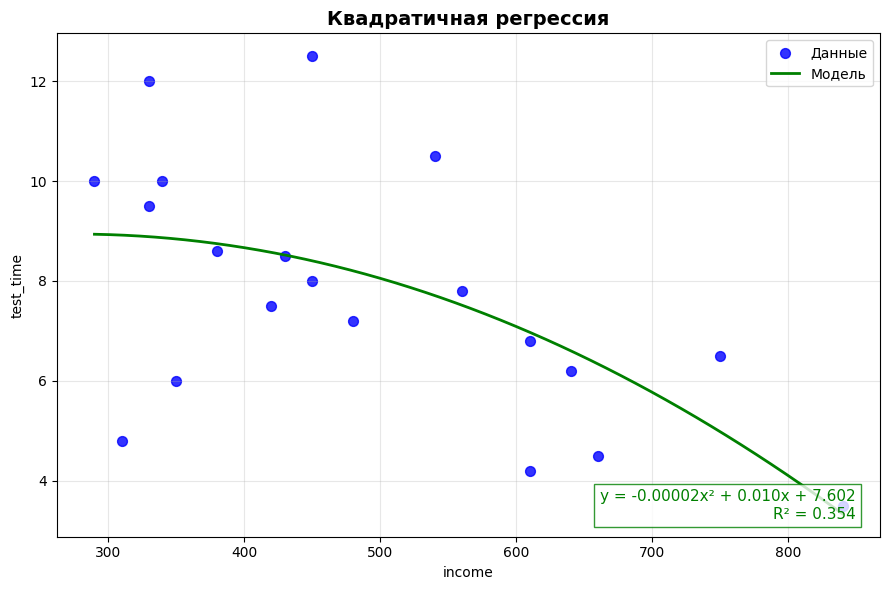

In [14]:
plot_model("–ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è",
           y_pred_quad,
           f"y = {w2:.5f}x¬≤ + {w1_quad:.3f}x + {w0_quad:.3f}\nR¬≤ = {r2_quad:.3f}",
           color='green')

3. –≥–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è

In [15]:
X_hyp = (1 / x).reshape(-1, 1)
model_hyp = LinearRegression().fit(X_hyp, y)
w1_hyp, w0_hyp = model_hyp.coef_[0], model_hyp.intercept_
x_range_hyp = (1 / x_range)
y_pred_hyp = model_hyp.predict(x_range_hyp)
r2_hyp = model_hyp.score(X_hyp, y)

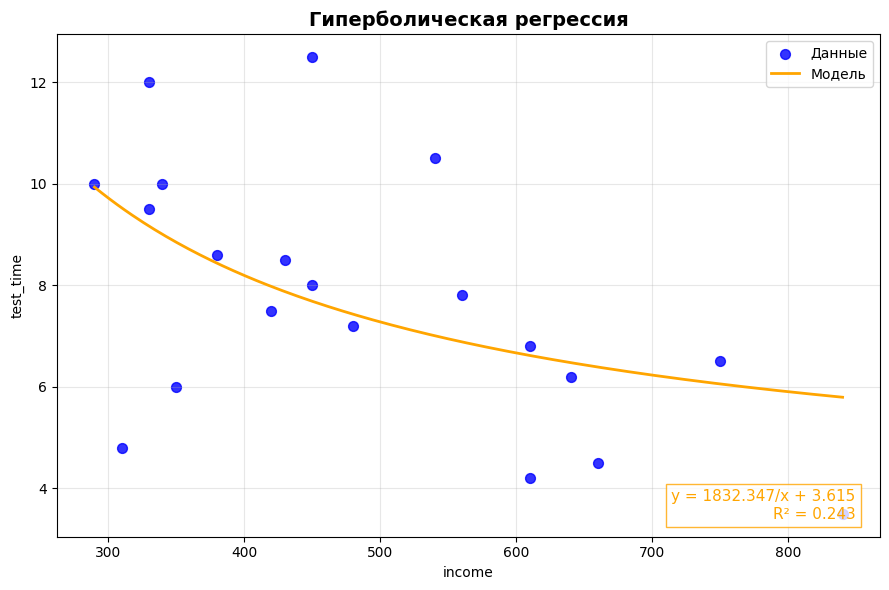

In [16]:
plot_model("–ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è",
           y_pred_hyp,
           f"y = {w1_hyp:.3f}/x + {w0_hyp:.3f}\nR¬≤ = {r2_hyp:.3f}",
           color='orange')

4. –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è

In [17]:
y_log = np.log(y)
model_exp = LinearRegression().fit(X, y_log)
ln_w1, ln_w0 = model_exp.coef_[0], model_exp.intercept_
w1_exp, w0_exp = np.exp(ln_w1), np.exp(ln_w0)
y_pred_exp = w0_exp * (w1_exp ** x_range.flatten())
r2_exp = model_exp.score(X, y_log)

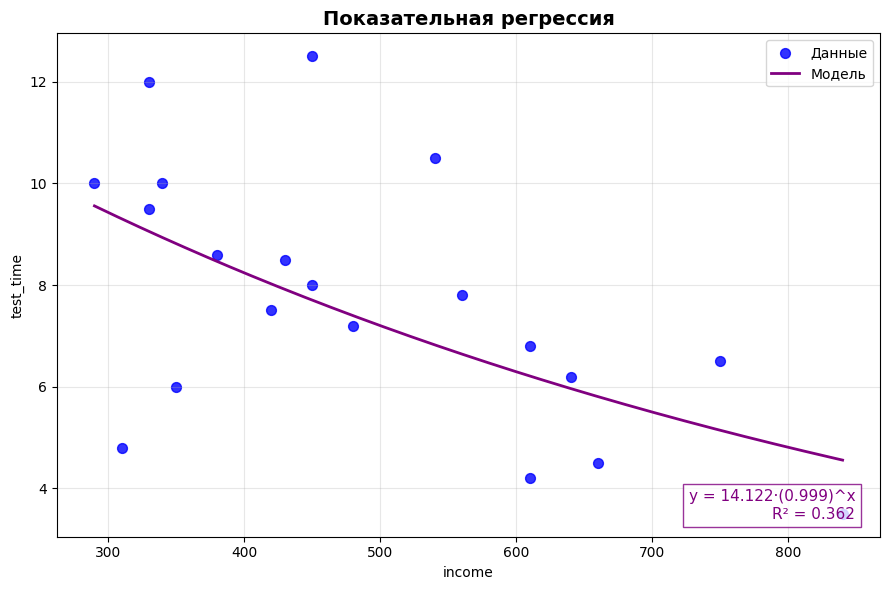

In [18]:
plot_model("–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è",
           y_pred_exp,
           f"y = {w0_exp:.3f}¬∑({w1_exp:.3f})^x\nR¬≤ = {r2_exp:.3f}",
           color='purple')

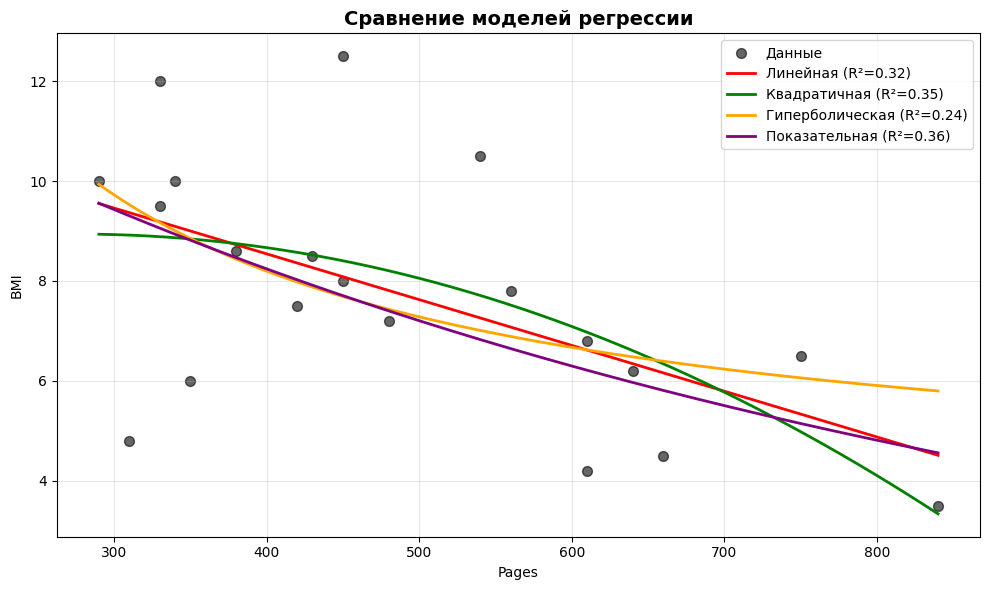

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='black', s=50, alpha=0.6, label='–î–∞–Ω–Ω—ã–µ')
plt.plot(x_range, y_pred_lin, 'r-', lw=2, label=f"–õ–∏–Ω–µ–π–Ω–∞—è (R¬≤={r2_lin:.2f})")
plt.plot(x_range, y_pred_quad, 'g-', lw=2, label=f"–ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è (R¬≤={r2_quad:.2f})")
plt.plot(x_range, y_pred_hyp, color='orange', lw=2, label=f"–ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è (R¬≤={r2_hyp:.2f})")
plt.plot(x_range, y_pred_exp, color='purple', lw=2, label=f"–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è (R¬≤={r2_exp:.2f})")

plt.title("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏", fontsize=14, weight='bold')
plt.xlabel("Pages"); plt.ylabel("BMI")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

4. –ü—Ä–æ–≤–µ—Ä–∫–∞ —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
–î–ª—è –Ω–∞–∏–ª—É—á—à–µ–≥–æ –∏ –Ω–∞–∏—Ö—É–¥—à–µ–≥–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ –º–æ–µ–¥–ª–∏ –¥–∞–Ω–Ω—ã–º —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –§–∏—à–µ—Ä–∞

In [19]:
from scipy.stats import f
def fisher_test(model_name, y_true, y_pred, k_params, alpha=0.05):
    n = len(y_true)
    y_mean = np.mean(y_true)
    TSS = np.sum((y_true - y_mean)**2)           
    RSS = np.sum((y_true - y_pred)**2)           
    ESS = TSS - RSS                             

    df_regression = k_params
    df_residual = n - k_params - 1
    MS_regression = ESS / df_regression
    MS_residual = RSS / df_residual

    F_statistic = MS_regression / MS_residual
    F_critical = f.ppf(1 - alpha, df_regression, df_residual)
    p_value = 1 - f.cdf(F_statistic, df_regression, df_residual)
    R2 = ESS / TSS

    return {
        "–ú–æ–¥–µ–ª—å": model_name,
        "R¬≤": round(R2, 4),
        "F": round(F_statistic, 4),
        "F_–∫—Ä": round(F_critical, 4),
        "p-value": round(p_value, 5),
        "–í—ã–≤–æ–¥": "–ó–Ω–∞—á–∏–º–∞" if F_statistic > F_critical else "–ù–µ–∑–Ω–∞—á–∏–º–∞"
    }

results = []

y_pred_lin = model_lin.predict(x.reshape(-1, 1))
y_pred_quad = model_quad.predict(np.column_stack((x**2, x)))
y_pred_hyp = model_hyp.predict((1/x).reshape(-1, 1))
y_pred_exp = np.exp(model_exp.predict(x.reshape(-1, 1))) 
results.append(fisher_test("–õ–∏–Ω–µ–π–Ω–∞—è", y, y_pred_lin, k_params=1))
results.append(fisher_test("–ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è", y, y_pred_quad, k_params=2))
results.append(fisher_test("–ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è", y, y_pred_hyp, k_params=1))
results.append(fisher_test("–ü–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è", y, y_pred_exp, k_params=1))

df_fisher = pd.DataFrame(results)
display(df_fisher)

–ú–æ–¥–µ–ª—å      R¬≤       F    F_–∫—Ä  p-value    –í—ã–≤–æ–¥
0         –õ–∏–Ω–µ–π–Ω–∞—è  0.3248  8.6579  4.4139  0.00871  –ó–Ω–∞—á–∏–º–∞
1     –ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è  0.3542  4.6615  3.5915  0.02432  –ó–Ω–∞—á–∏–º–∞
2  –ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è  0.2428  5.7709  4.4139  0.02730  –ó–Ω–∞—á–∏–º–∞
3    –ü–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è  0.2880  7.2812  4.4139  0.01470  –ó–Ω–∞—á–∏–º–∞

–ü—Ä–æ–≤–µ—Ä–∫–∞ –º–æ–¥–µ–ª–µ–π –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –§–∏—à–µ—Ä–∞ –ø–æ–∫–∞–∑–∞–ª–∞, —á—Ç–æ –≤—Å–µ —á–µ—Ç—ã—Ä–µ –≤–∏–¥–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–π ‚Äî –ª–∏–Ω–µ–π–Ω–∞—è, –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è, –≥–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è –∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å–Ω–∞—è ‚Äî –æ–∫–∞–∑–∞–ª–∏—Å—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–º–∏ 
 –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —É—Ä–∞–≤–Ω–µ–Ω–∏—è  –æ—Ç—Ä–∞–∂–∞—é—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω—É—é–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

In [48]:
best_model = df_fisher.loc[df_fisher["R¬≤"].idxmax()]
worst_model = df_fisher.loc[df_fisher["R¬≤"].idxmin()]
print(f"\n–ù–∞–∏–ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: {best_model['–ú–æ–¥–µ–ª—å']} (R¬≤ = {best_model['R¬≤']:.4f}) ‚Äî {best_model['–í—ã–≤–æ–¥']}")
print(f"üìâ –ù–∞–∏—Ö—É–¥—à–∞—è –º–æ–¥–µ–ª—å: {worst_model['–ú–æ–¥–µ–ª—å']} (R¬≤ = {worst_model['R¬≤']:.4f}) ‚Äî {worst_model['–í—ã–≤–æ–¥']}")


–ù–∞–∏–ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: –ö–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è (R¬≤ = 0.3542) ‚Äî –ó–Ω–∞—á–∏–º–∞
üìâ –ù–∞–∏—Ö—É–¥—à–∞—è –º–æ–¥–µ–ª—å: –ì–∏–ø–µ—Ä–±–æ–ª–∏—á–µ—Å–∫–∞—è (R¬≤ = 0.2428) ‚Äî –ó–Ω–∞—á–∏–º–∞
